# Strong Scaling Test - CPU

Grid: $n_x\times n_y\times n_z=256^3$

In [1]:
import os, sys
sys.path += ['..']
import plot_tools as pt
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from math import log, sqrt

# more setup
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 64-1 Steps

In [2]:
data_MPI = [
    [56, 303-16],
    [112, 169-11],
    [224, 108-7],
    [448, 70-6],
    [896, 43-7],
    [1782, 29-9],
    [3584, 21-9],
    [7168, 18-11],
    [14336, 39-21]
]
print(tabulate(data_MPI,
               headers=["MPI","Time(sec)"],
               floatfmt=("",".7f"),
               tablefmt="github"))

|   MPI |   Time(sec) |
|-------|-------------|
|    56 |         287 |
|   112 |         158 |
|   224 |         101 |
|   448 |          64 |
|   896 |          36 |
|  1782 |          20 |
|  3584 |          12 |
|  7168 |           7 |
| 14336 |          18 |


 
0.7614 x + 0.3647


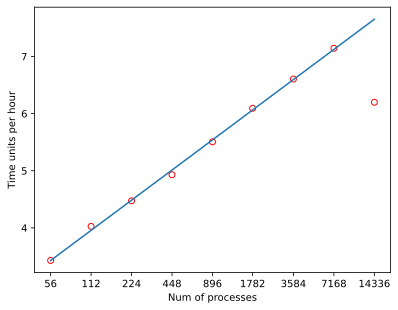

In [4]:
scaling = pt.ScalingSet(data_MPI)

# plot
plt.plot([log(i) for i in scaling.dataset[0]],
         [log((63*0.039062)/(i/3600)) for i in scaling.dataset[1]],
         linestyle='', marker='o', mfc='none', color='red')
plt.xticks([log(i) for i in scaling.dataset[0]], scaling.dataset[0])
plt.xlabel('Num of processes')
plt.ylabel('Time units per hour')

# fitting
scaling_log = pt.ScalingSet(data_MPI,
                            fx=lambda x:log(x),
                            fy=lambda y:log((63*0.039062)/(y/3600)))
scaling_log.fitdata(fit_range=slice(0,-1))
plt.plot(scaling_log.dataset[0], scaling_log.dataset[2])
plt.savefig('./scaling.pdf', bbox_inches='tight')

In [5]:
7168**(1/3)

19.281138113401838

In [7]:
256/19.281138113401838

13.277224533859897

In [8]:
14336**(1/3)

24.292711775005294

In [9]:
256/24.292711775005294

10.538140096133594